# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing Data

In [2]:
!mkdir data/
!wget https://raw.githubusercontent.com/karan-gh/Water-Potability-Dataset/main/water_potability.csv

The syntax of the command is incorrect.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
water = pd.read_csv('water_potability.csv')
water.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'water_potability.csv'

In [103]:
water.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

In [104]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [105]:
water.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

# Cleaning Data

In [106]:
# Check null data
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [107]:
# Fill null data with mean value of each attributes
water = water.fillna(water.mean())
water

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [108]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


There is no null data left

In [109]:
# Check Outlier on Numeric Columns
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [110]:
for col in water.columns:
    print(col, check_outlier(water, col))

ph False
Hardness False
Solids False
Chloramines False
Sulfate False
Conductivity False
Organic_carbon False
Trihalomethanes False
Turbidity False
Potability False


There are no outlier in data columns

# Exploratory Data Analysis

## Univariate Analysis

### Histograms

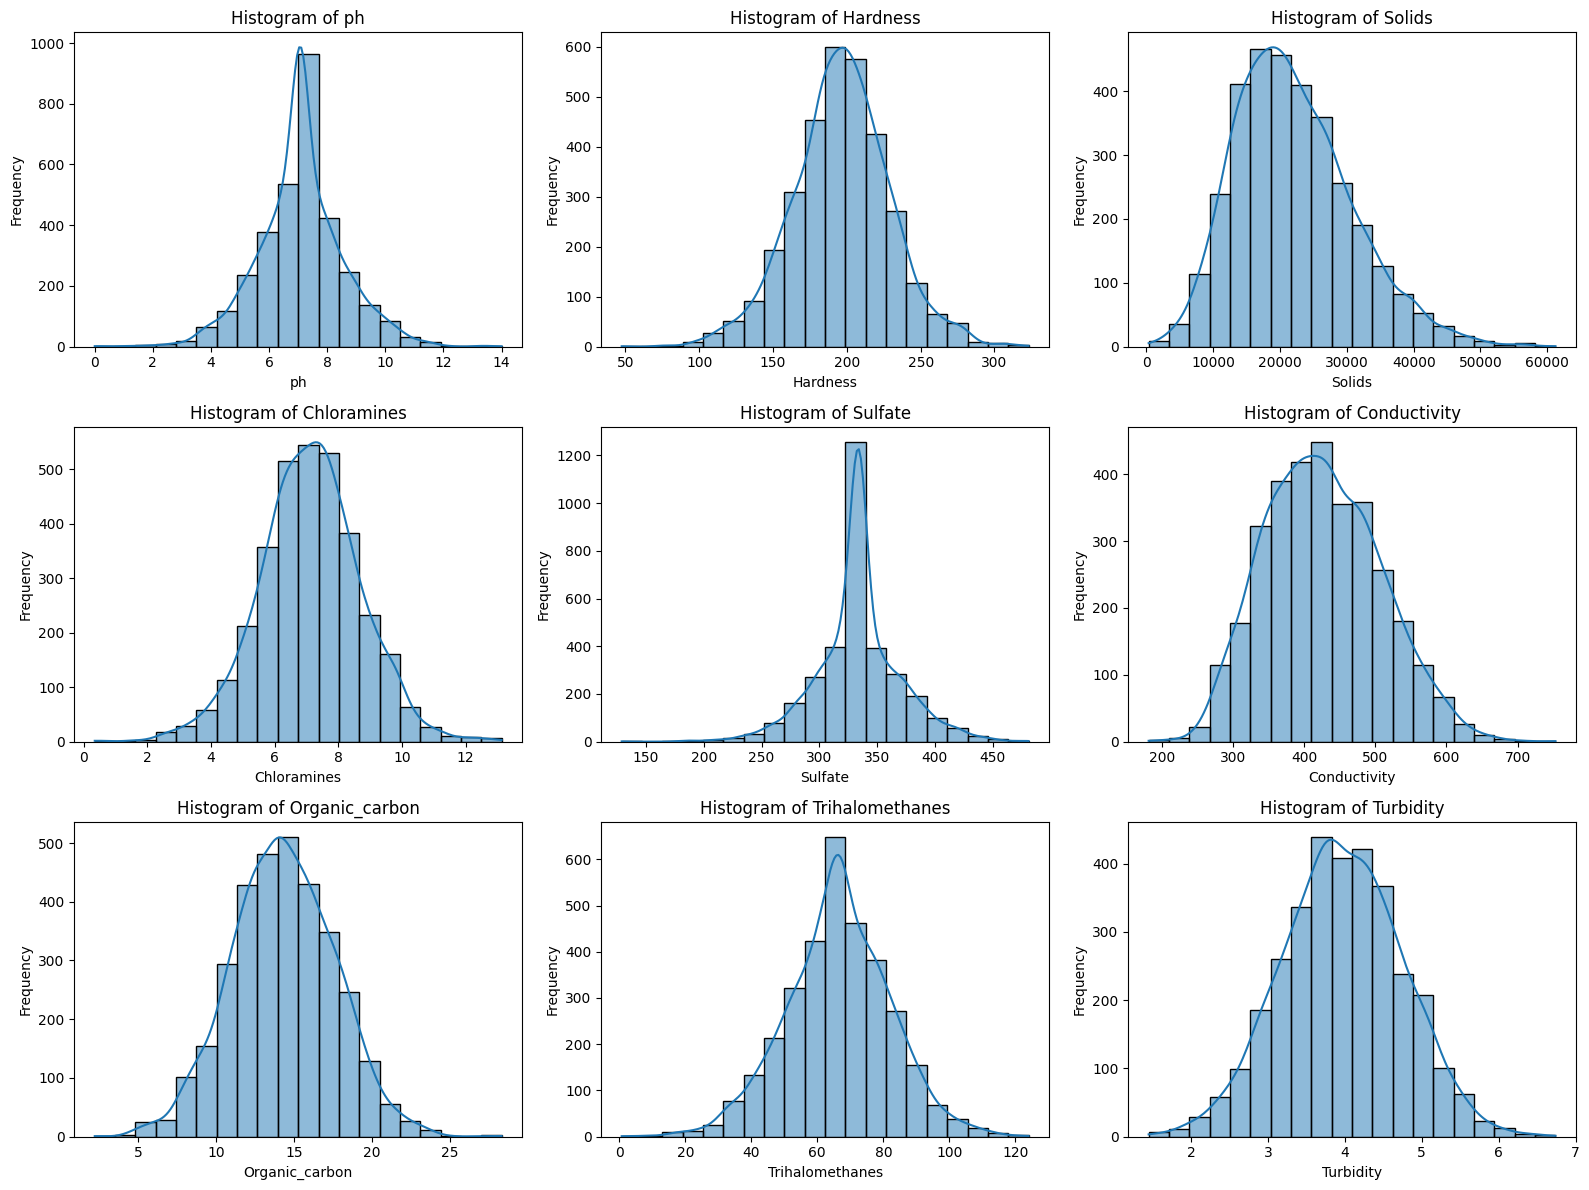

In [111]:
# Get all feature columns except 'Potability'
feature_columns = water.drop('Potability', axis=1).columns

# Calculate the number of rows needed for subplots
num_features = len(feature_columns)
num_rows = (num_features + 2) // 3  # Round up to the nearest integer

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(16, num_rows*4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for all features
for i, col in enumerate(feature_columns):
    sns.histplot(x=water[col], data=water, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots
for j in range(num_features, num_rows*3):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Potability Counts

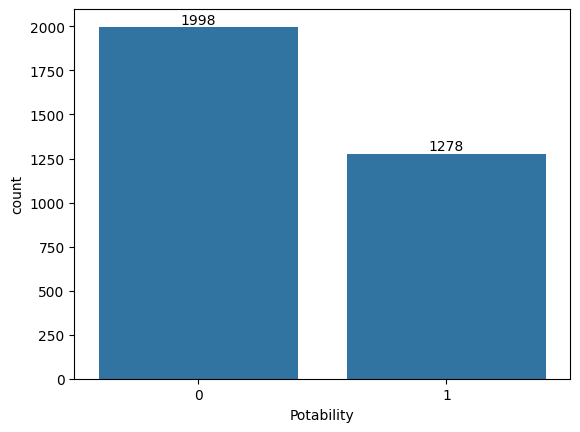

In [112]:
# sns.countplot(x=water['Potability'], data=water)
# plt.show()
sns.countplot(x=water['Potability'], data=water)

# Get the counts for each category
counts = water['Potability'].value_counts()

# Annotate each bar with its count
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

## Bivariate Analysis

### `Sulfate` vs `pH`

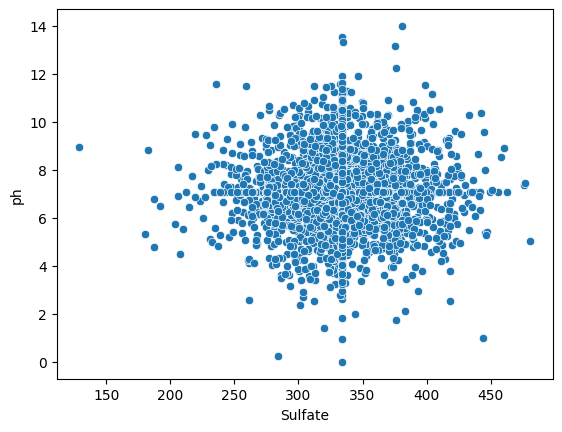

In [113]:
sns.scatterplot(x=water['Sulfate'], y=water['ph'], data=water)
plt.show()

### `Solids` vs `Hardness`

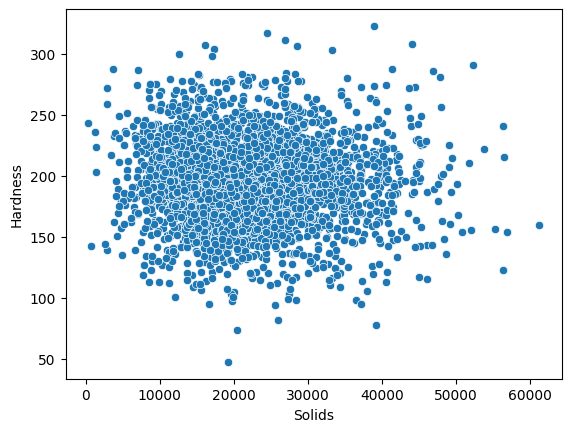

In [114]:
sns.scatterplot(x=water['Solids'], y=water['Hardness'], data=water)
plt.show()

### `Solids` vs `Turbidity`

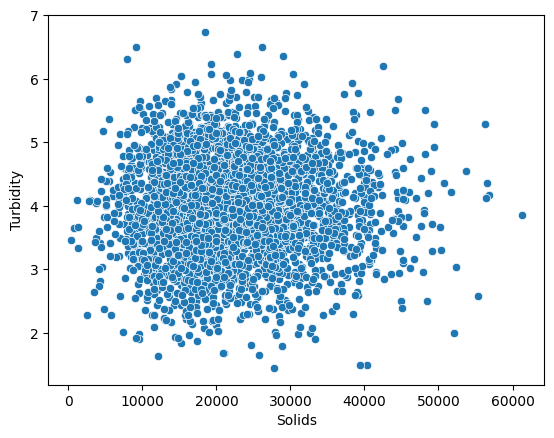

In [115]:
sns.scatterplot(x=water['Solids'], y=water['Turbidity'], data=water)
plt.show()

##Pairplots

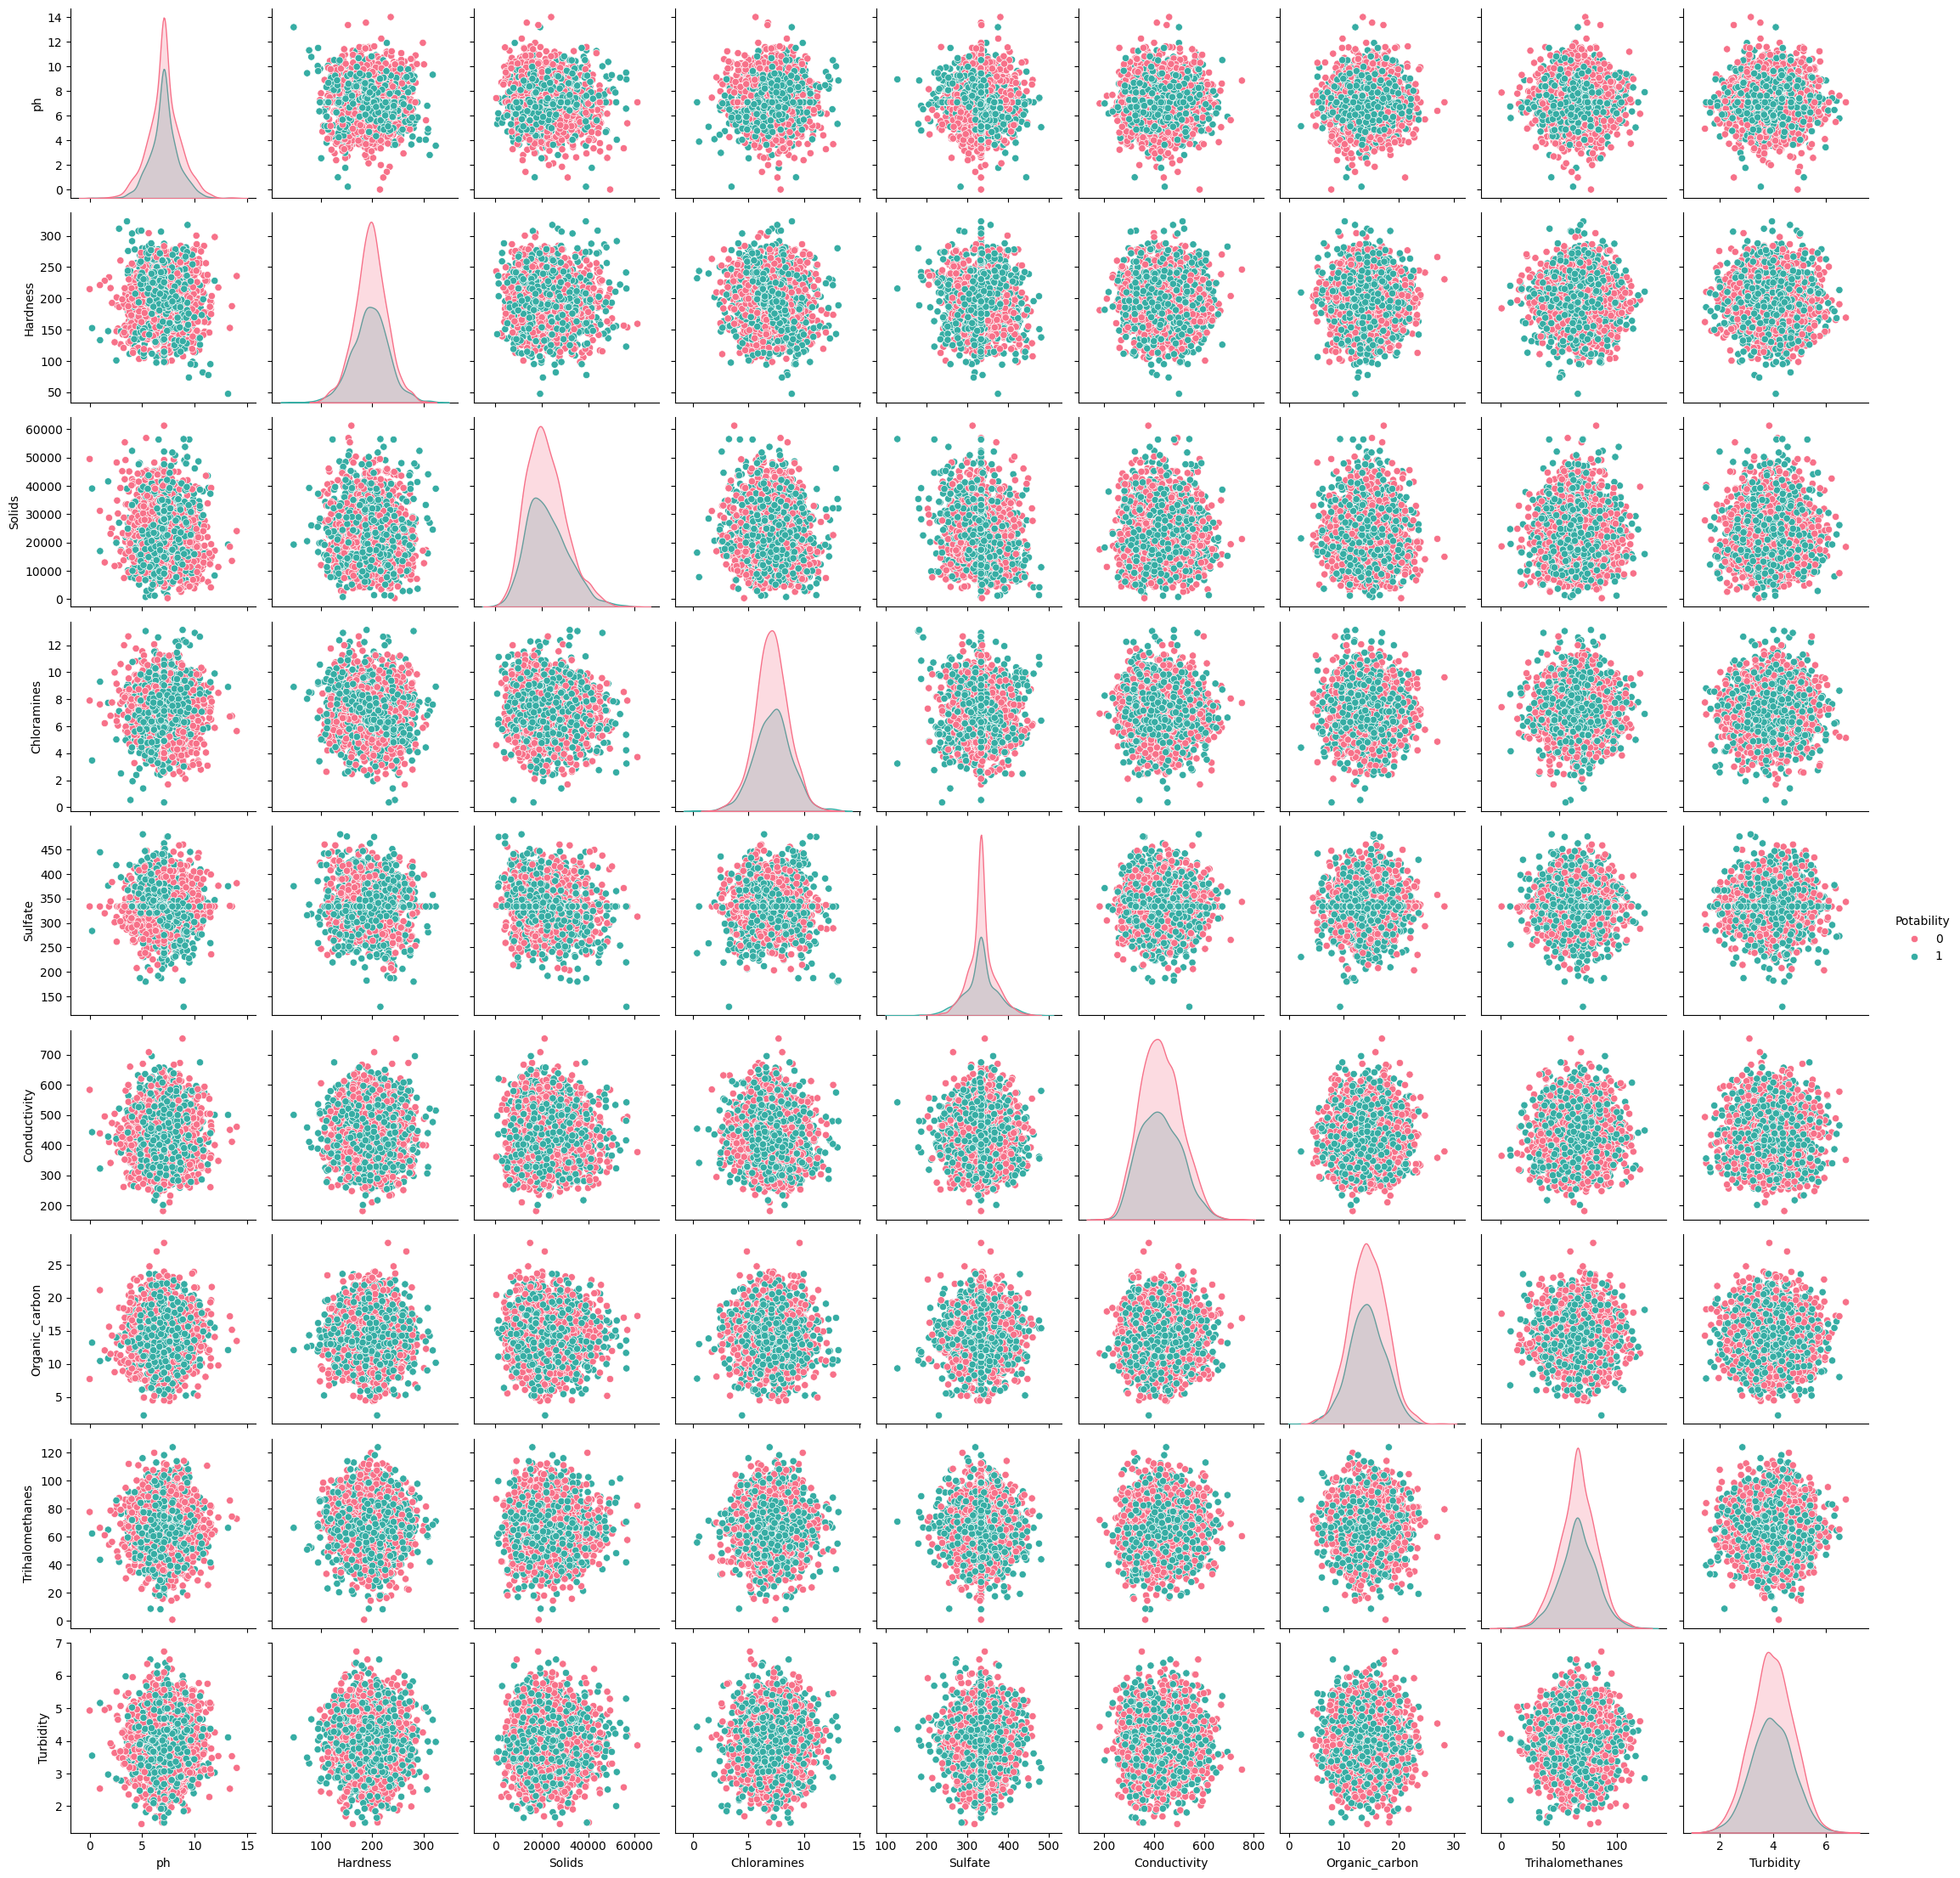

In [116]:
import seaborn as sns

# Create pairplot
sns.pairplot(water, diag_kind='kde', hue='Potability', palette='husl')
plt.show()

## Multivariate Analysis

### Correlation Matrix

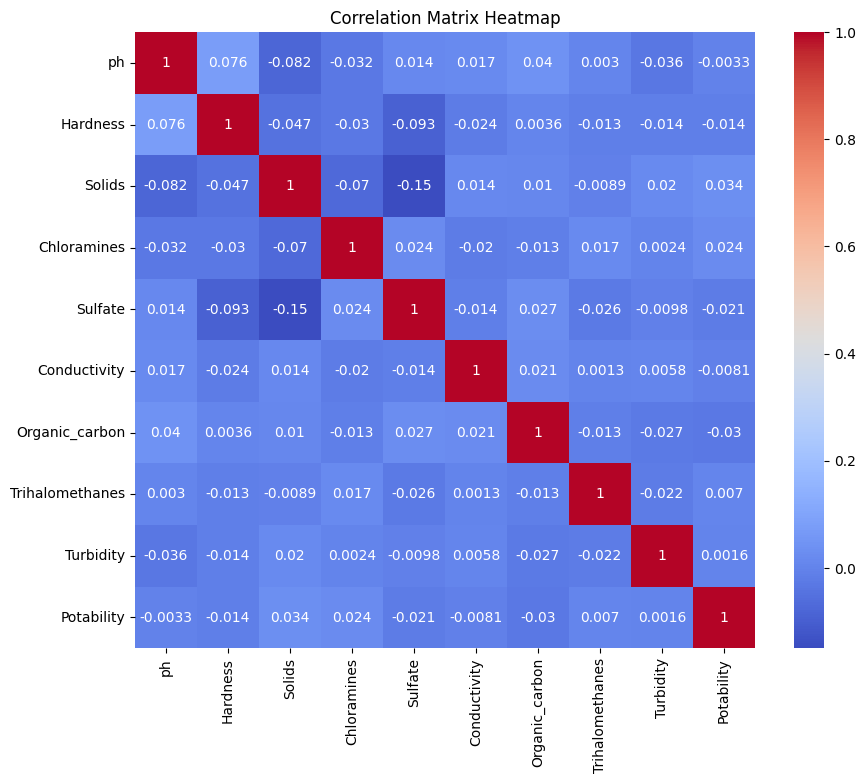

In [117]:
corr = water.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Water Potability Prediction

## Preparing Data

In [118]:
X = water.drop('Potability', axis=1)
Y = water['Potability']

## Train Test Split

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=40)

## Standardize Dataset

In [120]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Development

### Model 1 : Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

In [122]:
# Fit the training data
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [123]:
lr_model.score(X_test, Y_test)

0.5991861648016277

In [124]:
# Predict test data
pred = lr_model.predict(X_test)

#Check model accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       590
           1       0.00      0.00      0.00       393

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.36      0.60      0.45       983



ROC for Logistic Regression

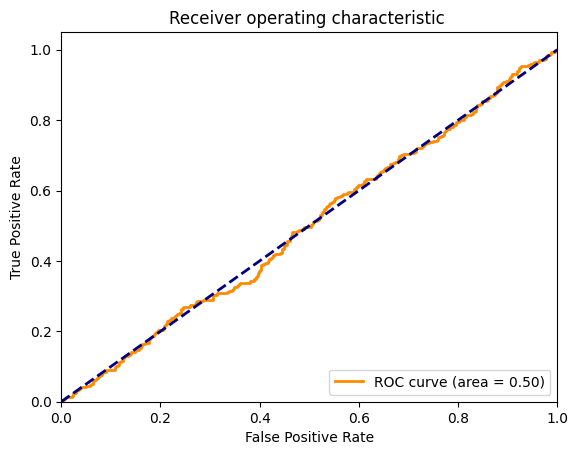

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probability scores
pred_prob = lr_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

### Model 2 : Random Forest Classifier

In [126]:
# Import RFC library
from sklearn.ensemble import RandomForestClassifier

# Create a RFC Model
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [127]:
rfc.score(X_test, Y_test)

0.6683621566632757

In [128]:
pred = rfc.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       590
           1       0.66      0.35      0.46       393

    accuracy                           0.67       983
   macro avg       0.67      0.62      0.61       983
weighted avg       0.67      0.67      0.64       983



ROC for Random forest classifier

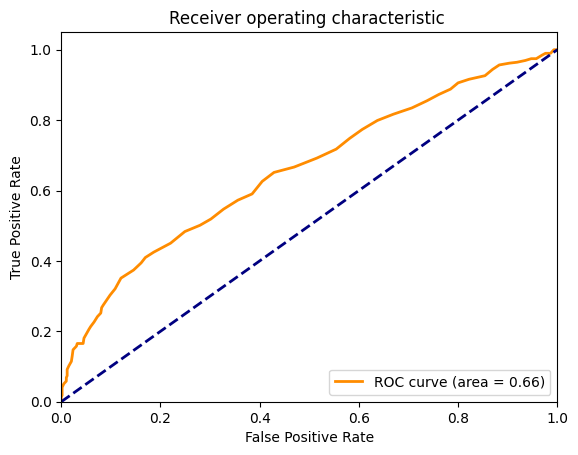

In [129]:
import matplotlib.pyplot as plt
# Predict probability scores
pred_prob = rfc.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

### Model 3 : Decision Tree Classifier

In [130]:
from sklearn.tree import DecisionTreeClassifier

# Create model
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [131]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [132]:
dt.score(X_test, Y_test)

0.5849440488301119

In [133]:
pred = dt.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       590
           1       0.48      0.48      0.48       393

    accuracy                           0.58       983
   macro avg       0.57      0.57      0.57       983
weighted avg       0.58      0.58      0.58       983



ROC for Decision Tree Classifier

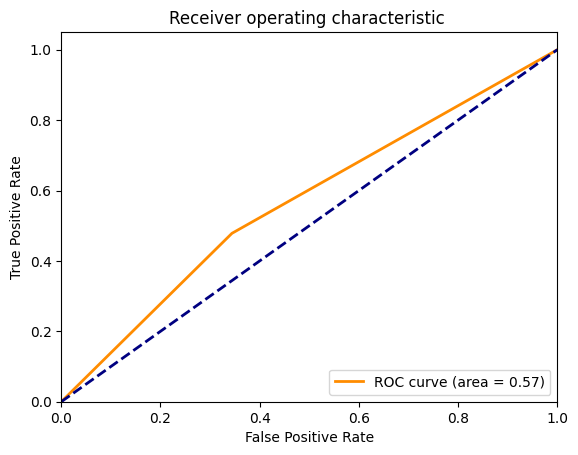

In [134]:
import matplotlib.pyplot as plt
# Predict probability scores
pred_prob = dt.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

### Model 4 : K-Nearest Neighbors

In [135]:
# Import KNN library
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the training data
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [136]:
# Check accuracy on test data
knn.score(X_test, Y_test)

0.6154628687690743

In [137]:
# Predict test data
pred = knn.predict(X_test)

# Check model accuracy
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       590
           1       0.53      0.38      0.44       393

    accuracy                           0.62       983
   macro avg       0.59      0.58      0.58       983
weighted avg       0.60      0.62      0.60       983



ROC for KNN

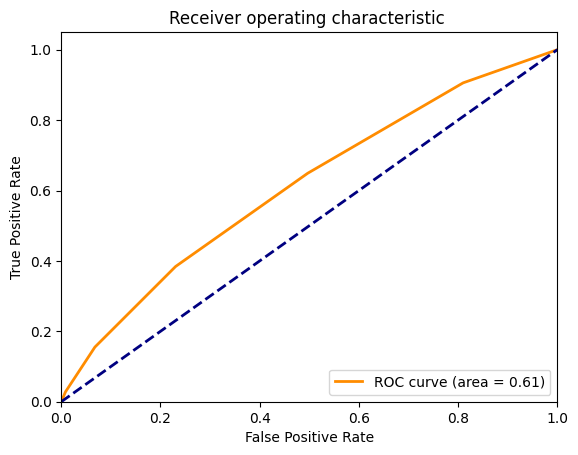

In [138]:
import matplotlib.pyplot as plt
# Predict probability scores
pred_prob = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

# Accuracy Score Plot

<ipython-input-139-0a8fc69dc4d5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="score", y="model", data=df_models, palette=colors, orient='h')  # Horizontal orientation


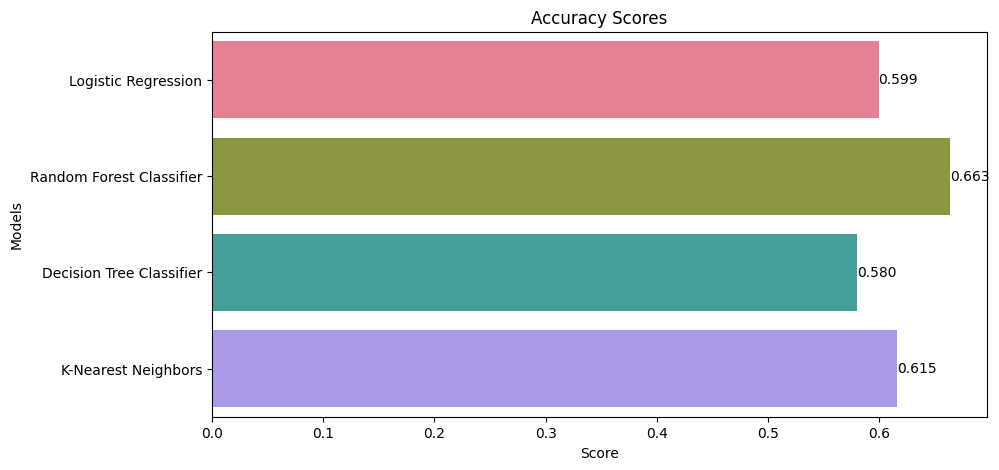

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette
colors = sns.color_palette("husl", len(df_models))

plt.figure(figsize=(10, 5))
sns.barplot(x="score", y="model", data=df_models, palette=colors, orient='h')  # Horizontal orientation
plt.xlabel("Score")
plt.ylabel("Models")
plt.title("Accuracy Scores")

for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                   '{:.3f}'.format(bar.get_width()), ha="left", va="center", color='black')

plt.show()


# Hyper Parameter Tunning for Random Forest Classifier

In [140]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(best_params)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# **Best model score:**

In [141]:
best_model = grid_search.best_estimator_
best_model_score = round(best_model.score(X_test, Y_test), 3)
print('Best model score:')
print(best_model_score)


Best model score:
0.66


# Classification Report

In [142]:
import matplotlib.pyplot as plt
# Get the predictions for the test data
y_pred = best_model.predict(X_test)

# Print the classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.88      0.76       590
           1       0.65      0.33      0.44       393

    accuracy                           0.66       983
   macro avg       0.65      0.61      0.60       983
weighted avg       0.66      0.66      0.63       983



# Confusion Matrix

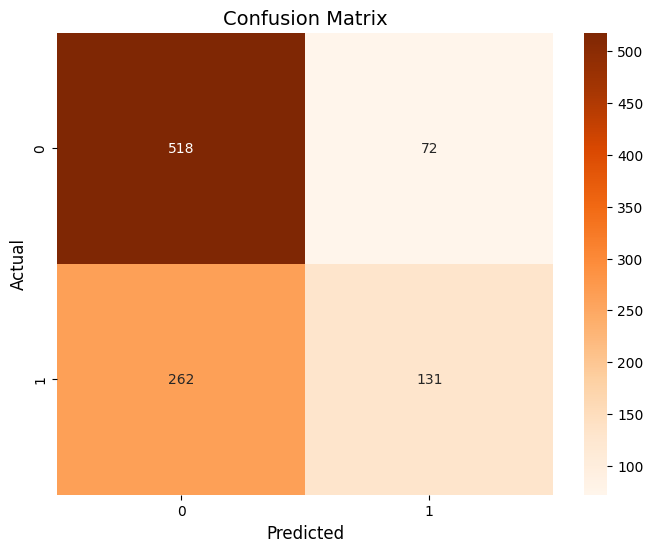

In [143]:
# Plot the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# ROC for Best Model: Random Forest Classifier


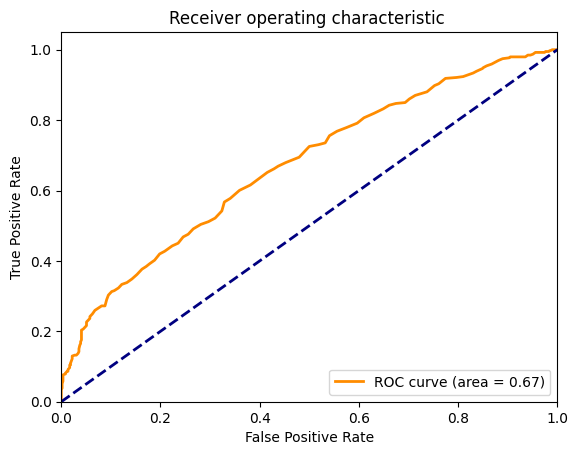

In [144]:
import matplotlib.pyplot as plt
# Predict probability scores for the test data
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()